In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.2 MB/s eta 0:00:00


In [ ]:
# Card detection model
from ultralytics import YOLO
import torch

DATA_CONFIG="datasets/card_detection/data.yaml"

PRETRAINED_MODEL="yolov8n.pt"

PROJECT_NAME="card_detector_runs"
RUN_NAME="yolo_card_detector"

EPOCHS=50
IMAGE_SIZE=640
BATCH_SIZE=16
LEARNING_RATE=0.001

def train():
  model=YOLO(PRETRAINED_MODEL)

  model.train(
      data=DATA_CONFIG,
      epochs=EPOCHS,
      imgsz=IMAGE_SIZE,
      batch=BATCH_SIZE,
      lr0=LEARNING_RATE,
      project=PROJECT_NAME,
      name=RUN_NAME,
      pretrained=True,
      optimizer='Adam',
      augment=True,
      hsv_h=0.015,
      hsv_s=0.7,
      hsv_v=0.4,
      translate=0.1,
      scale=0.5,
      mosaic=1.0,
      mixup=0.2
  )
  print("Training Finished!")
  print("Best model saved at:")
  print(f"{PROJECT_NAME}/{RUN_NAME}/weights/best.pt")

if __name__=="__main__":
  train()

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/card_detection_dataset/card_detection_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgs

In [2]:
from ultralytics import YOLO

In [21]:
model=YOLO(r"..\models\card_detector.pt")

model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [15]:
img=r'C:\shivraj\document-ai\datasets\aadhar_fields\test\images\aadhar1.jpg'

In [22]:
result=model(img)


image 1/1 C:\shivraj\document-ai\datasets\aadhar_fields\test\images\aadhar1.jpg: 640x640 1 aadhar, 166.4ms
Speed: 5.0ms preprocess, 166.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


In [23]:
import matplotlib.pyplot as plt

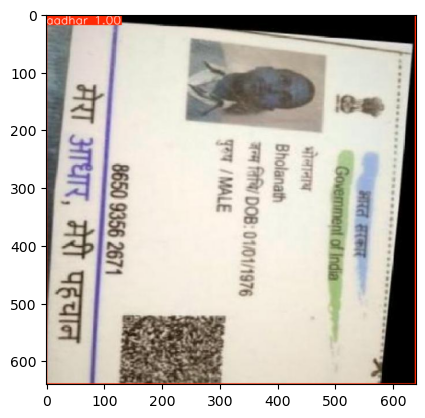

In [24]:
plt.imshow(result[0].plot())
